<a href="https://colab.research.google.com/github/armandoordonez/deeplearning/blob/main/Copia_de_Barreto_Martinez_CONV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Felipe Barreto y Laura Martínez**

In [ ]:
import keras
keras.__version__

'2.15.0'

# **Classifying types of bears: a binary classification example**

The [dataset](https://www.kaggle.com/datasets/mattop/panda-or-bear-image-classification/data) contains panda and bear images generated by DALL-E Mini, an AI model that draws images from any prompt. The task for this dataset is binary classification.

In [ ]:
# General imports
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage

# Metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

# Imports para el preprocesamiento de imagenes
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

# Keras imports
from keras import models
from keras import layers
from keras.utils import to_categorical
import tensorflow as tf

In [ ]:
# Upload dataset
from google.colab import drive
drive.mount('gdrive')

Drive already mounted at gdrive; to attempt to forcibly remount, call drive.mount("gdrive", force_remount=True).


In [ ]:
batch_size = 10

# Keras ImageDataGenerator class provides a quick and easy way to augment the images
train_datagen = ImageDataGenerator(
    rescale = 1./255,       # Makes sure all pixels have the same dimensions
    rotation_range=20,      # Random rotation up to 20 degrees
    width_shift_range=0.1,  # Randomly shift width by up to 10%
    height_shift_range=0.1, # Randomly shift height by up to 10%
    shear_range=0.2,        # Shear intensity
    zoom_range=0.2,         # Random zoom
    horizontal_flip=True,   # Randomly flip images horizontally
    vertical_flip=False,    # No vertical flipping
    fill_mode='nearest'     # Fill points outside input boundaries
)

test_datagen = ImageDataGenerator(
    rescale = 1./255       # Makes sure all pixels have the same dimensions
)


# Generates batches of augmented image data. It applies different transformations.
train_generator = train_datagen.flow_from_directory(
    #'/content/gdrive/MyDrive/u/Semestre 8/ia/datasets/PandasBears/Train',
    '/content/gdrive/MyDrive/Semestre 10/IA 2/PandasBears/Train',
    target_size = (128, 128), #image resolution
    batch_size = batch_size,
    shuffle = True, #lets us create more images
    subset='training',
    class_mode = 'binary' #adds the label 1 for panda 0 for other bears
)

test_generator = test_datagen.flow_from_directory(
    #'/content/gdrive/MyDrive/u/Semestre 8/ia/datasets/PandasBears/Test',
    '/content/gdrive/MyDrive/Semestre 10/IA 2/PandasBears/Test',
    target_size = (128, 128), #image resolution
    batch_size = batch_size,
    shuffle = True, #lets us create more images
    class_mode = 'binary' #adds the label 1 for panda 0 for other bears
)

Found 500 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


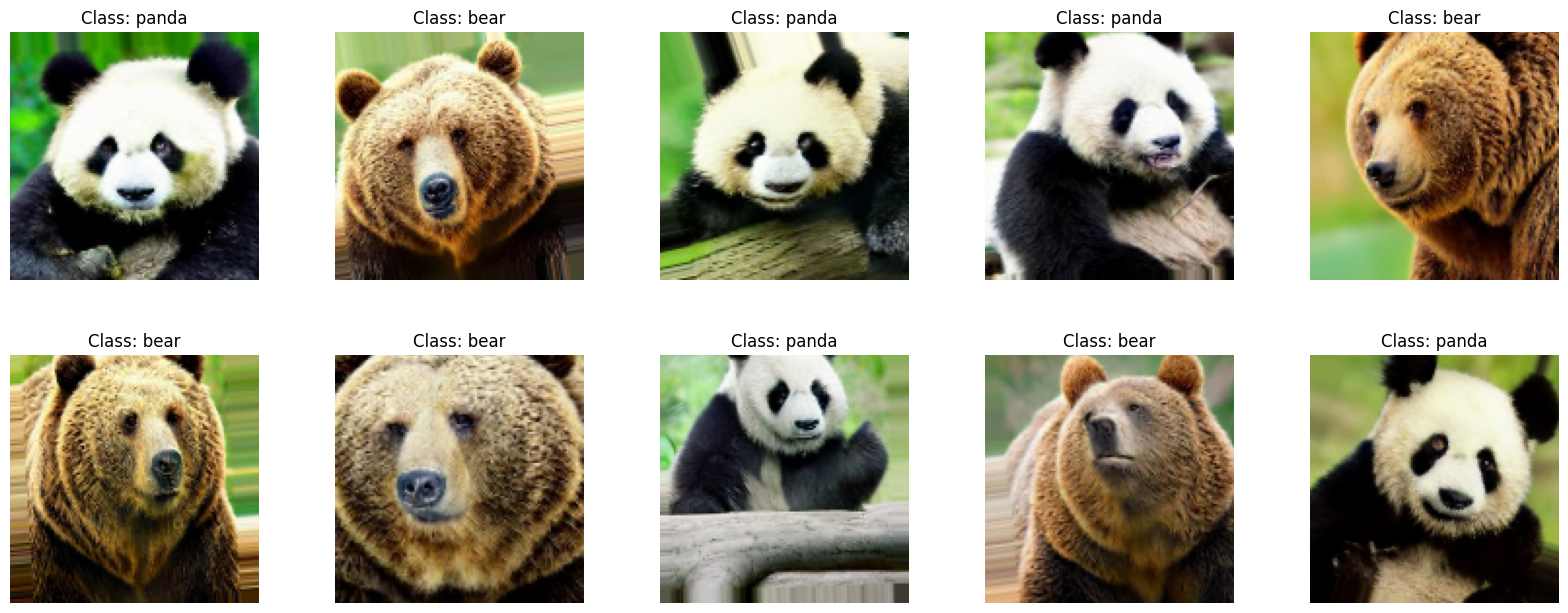

In [ ]:
# Here we convert the target label to an integer index and display a grid of 10 images along with their corresponding class labels

labels = ['bear', 'panda']

samples = train_generator.__next__()
images = samples[0]
target = samples[1]

plt.figure(figsize = (20,20))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.subplots_adjust(hspace=0.3,wspace=0.3)
    plt.imshow(images[i])
    plt.title(f"Class: {labels[int(target[i])]}")
    plt.axis('off')

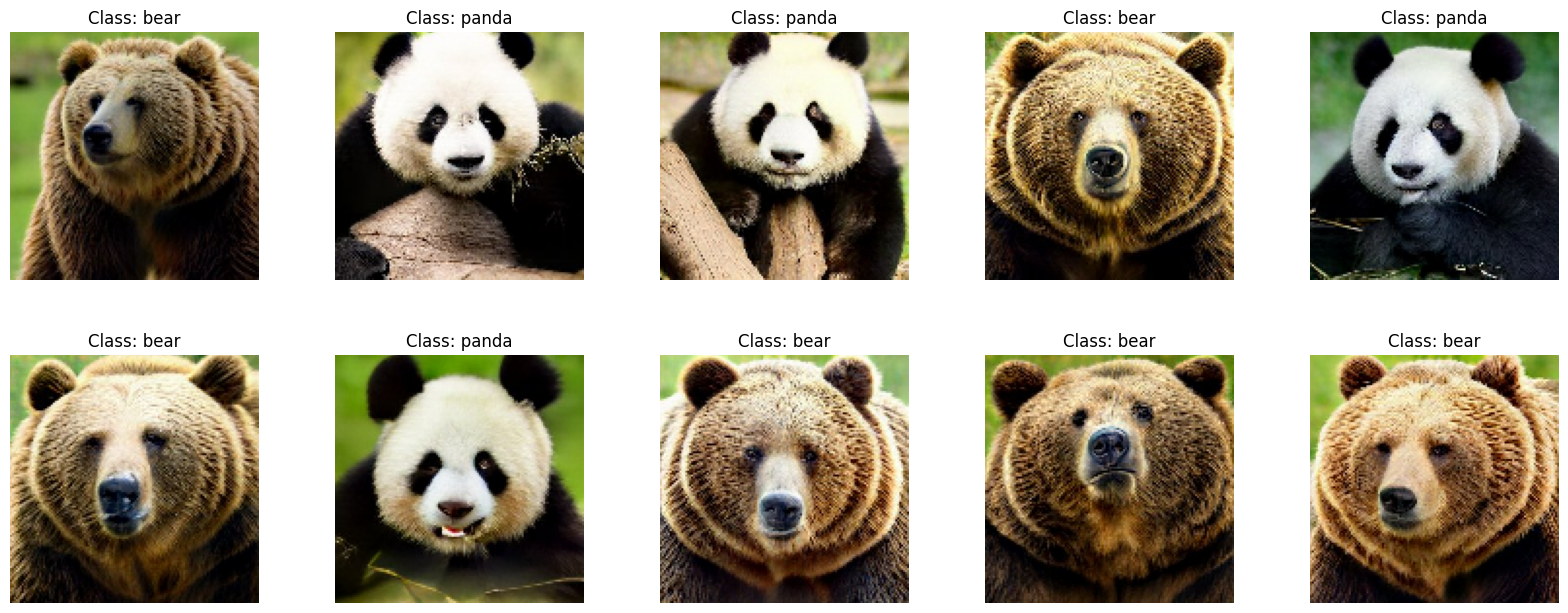

In [ ]:
# Here we convert the target label to an integer index and display a grid of 10 images along with their corresponding class labels

labels = ['bear', 'panda']

samples = test_generator.__next__()
images = samples[0]
target = samples[1]

plt.figure(figsize = (20,20))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.subplots_adjust(hspace=0.3,wspace=0.3)
    plt.imshow(images[i])
    plt.title(f"Class: {labels[int(target[i])]}")
    plt.axis('off')

## **Building the VGG16 model**

In [ ]:
from keras.applications.vgg16 import VGG16

from keras.layers import Dense,Flatten,Dropout
from keras import Sequential

The VGG-16 model is a convolutional neural network (CNN). Is characterized by its depth, consisting of 16 layers, including 13 convolutional layers and 3 fully connected layers.

<a href="https://ibb.co/kV1j9p"><img src="https://datagen.tech/wp-content/uploads/2022/11/image2-1.png" alt="gec2" border="0"></a>

In [ ]:
conv_base = VGG16(
    weights = 'imagenet', #the trained model we're going to use
    include_top = False, #we want to use other layers after this model, so we set this to false
    input_shape = (64,64,3)
)

In [ ]:
#TEST
conv_base.trainable = False #We want to use vgg16 as an feature extraction (asumo que significa que va a sacar puntos importantes para que el resto del modelo los use), so we don't want it to train

In [ ]:
model1 = Sequential()

model1.add(conv_base)
model1.add(Flatten())
model1.add(Dense(10,activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(1,activation='sigmoid'))

In [ ]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history1 = model1.fit(train_generator,epochs=10,validation_data=test_generator)

Epoch 1/10
50/50 [==============================] - 34s 659ms/step - loss: 0.5149 - accuracy: 0.7380 - val_loss: 0.1810 - val_accuracy: 1.0000
Epoch 2/10
50/50 [==============================] - 34s 676ms/step - loss: 0.2690 - accuracy: 0.8540 - val_loss: 0.0601 - val_accuracy: 1.0000
Epoch 3/10
50/50 [==============================] - 29s 586ms/step - loss: 0.1978 - accuracy: 0.9040 - val_loss: 0.0322 - val_accuracy: 0.9900
Epoch 4/10
50/50 [==============================] - 29s 579ms/step - loss: 0.1566 - accuracy: 0.9420 - val_loss: 0.0250 - val_accuracy: 0.9900
Epoch 5/10
50/50 [==============================] - 29s 574ms/step - loss: 0.1695 - accuracy: 0.9240 - val_loss: 0.0182 - val_accuracy: 0.9900
Epoch 6/10
50/50 [==============================] - 29s 578ms/step - loss: 0.1384 - accuracy: 0.9340 - val_loss: 0.0165 - val_accuracy: 0.9900
Epoch 7/10
50/50 [==============================] - 29s 581ms/step - loss: 0.1577 - accuracy: 0.9180 - val_loss: 0.0146 - val_accuracy: 0.9900

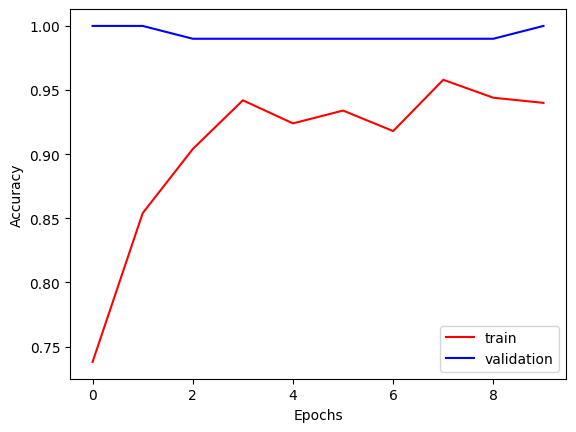

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history1.history['accuracy'],color='red',label='train')
plt.plot(history1.history['val_accuracy'],color='blue',label='validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## **Building the model**

<a id="5"></a>
###**What is Convolution Operation?**
* CNN is used for image classification, object detection
<a href="https://ibb.co/kV1j9p"><img src="https://preview.ibb.co/nRkBpp/gec2.jpg" alt="gec2" border="0"></a>
* We have some image and feature detector(3*3)
* Feature detector does not need to be 3 by 3 matrix. It can be 5 by 5 or 7 by 7.
* Feature detector = kernel = filter
* Feauture detector detects features like edges or convex shapes. Example, if out input is dog, feature detector can detect features like ear or tail of the dog.
* feature map = conv(input image, feature detector). Element wise multiplication of matrices.
* feature map = convolved feature
* Stride = navigating in input image.
* We reduce the size of image. This is important because code runs faster. However, we lost information.
* We create multiple feature maps because we use multiple feature detectors(filters).
* Lets look at gimp. Edge detect: [0,10,0],[10,-4,10],[0,10,0]
<a href="https://imgbb.com/"><img src="https://image.ibb.co/m4FQC9/gec.jpg" alt="gec" border="0"></a>
* After having convolution layer we use ReLU to break up linearity. Increase nonlinearity. Because images are non linear.
<a href="https://ibb.co/mVZih9"><img src="https://preview.ibb.co/gbcQvU/RELU.jpg" alt="RELU" border="0"></a>

<a id="6"></a>
### **Same Padding**
* As we keep applying conv layers, the size of the volume will decrease faster than we would like. In the early layers of our network, we want to preserve as much information about the original input volume so that we can extract those low level features.
* input size and output size are same.
<a href="https://ibb.co/jUPkUp"><img src="https://preview.ibb.co/noH5Up/padding.jpg" alt="padding" border="0"></a>

<a id="7"></a>
### **Max Pooling**
* It makes down-sampling or sub-sampling (Reduces the number of parameters)
* It makes the detection of features invariant to scale or orientation changes.
* It reduce the amount of parameters and computation in the network, and hence to also control overfitting.
<a href="https://ibb.co/ckTjN9"><img src="https://preview.ibb.co/gsNYFU/maxpool.jpg" alt="maxpool" border="0"></a>

<a id="8"></a>
### **Flattening**
<a href="https://imgbb.com/"><img src="https://image.ibb.co/c7eVvU/flattenigng.jpg" alt="flattenigng" border="0"></a>

<a id="9"></a>
### **Full Connection**
* Neurons in a fully connected layer have connections to all activations in the previous layer
* Artificial Neural Network
<a href="https://ibb.co/hsS14p"><img src="https://preview.ibb.co/evzsAU/fullyc.jpg" alt="fullyc" border="0"></a>

In [ ]:
import itertools
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import RMSprop,Adam
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras import regularizers

In [ ]:
model = Sequential()


# Convolutional Layer
model.add(Conv2D(filters = 8, kernel_size = (3,3), padding = 'same',
                 activation ='relu', input_shape = (128, 128, 3)))

model.add(BatchNormalization())

# Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

# Dropout layers
model.add(Dropout(0.25))

model.add(Conv2D(filters = 16, kernel_size = (3,3), padding = 'same',
                 activation ='relu'))
model.add(BatchNormalization())

# Pooling layer
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

# Dropout layers
model.add(Dropout(0.25))

# fully connected
model.add(Flatten())
model.add(Dense(128, activation = "relu", kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation = "sigmoid", kernel_regularizer=regularizers.l2(0.01)))

### **Define Optimizer**   

In [ ]:
# Define the optimizer
optimizer = Adam(learning_rate=0.001)

<a id="13"></a>
### **Compile Model**
* We make binary cross entropy at previous parts and in machine learning tutorial
* At this time we use categorical crossentropy. That means that we have multi class.
<a href="https://ibb.co/jm1bpp"><img src="https://preview.ibb.co/nN3ZaU/cce.jpg" alt="cce" border="0"></a>

In [ ]:
# Compile the model
model.compile(optimizer = optimizer, loss = "binary_crossentropy", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 8)       224       
                                                                 
 batch_normalization (Batch  (None, 128, 128, 8)       32        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 8)         0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 64, 64, 8)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 16)        1168      
                                                                 
 batch_normalization_1 (Bat  (None, 64, 64, 16)        6

### **Epochs and Batch Size**

In [ ]:
epochs = 5  # for better result increase the epochs
batch_size = 16

### **Fit the model**

In [ ]:
# Fit the model
history = model.fit(train_generator,
                    epochs = epochs, validation_data=test_generator,
                    batch_size = batch_size
                    )

Epoch 1/5
50/50 [==============================] - 14s 232ms/step - loss: 2.3207 - accuracy: 0.9640 - val_loss: 2.2994 - val_accuracy: 0.5000
Epoch 2/5
50/50 [==============================] - 12s 237ms/step - loss: 1.3941 - accuracy: 0.9740 - val_loss: 1.4840 - val_accuracy: 0.6300
Epoch 3/5
50/50 [==============================] - 11s 229ms/step - loss: 1.0269 - accuracy: 0.9820 - val_loss: 1.1258 - val_accuracy: 0.8400
Epoch 4/5
50/50 [==============================] - 14s 272ms/step - loss: 0.7481 - accuracy: 0.9800 - val_loss: 0.8038 - val_accuracy: 0.9900
Epoch 5/5
50/50 [==============================] - 11s 207ms/step - loss: 0.6317 - accuracy: 0.9780 - val_loss: 0.7226 - val_accuracy: 0.9300


### **Evaluate the model**

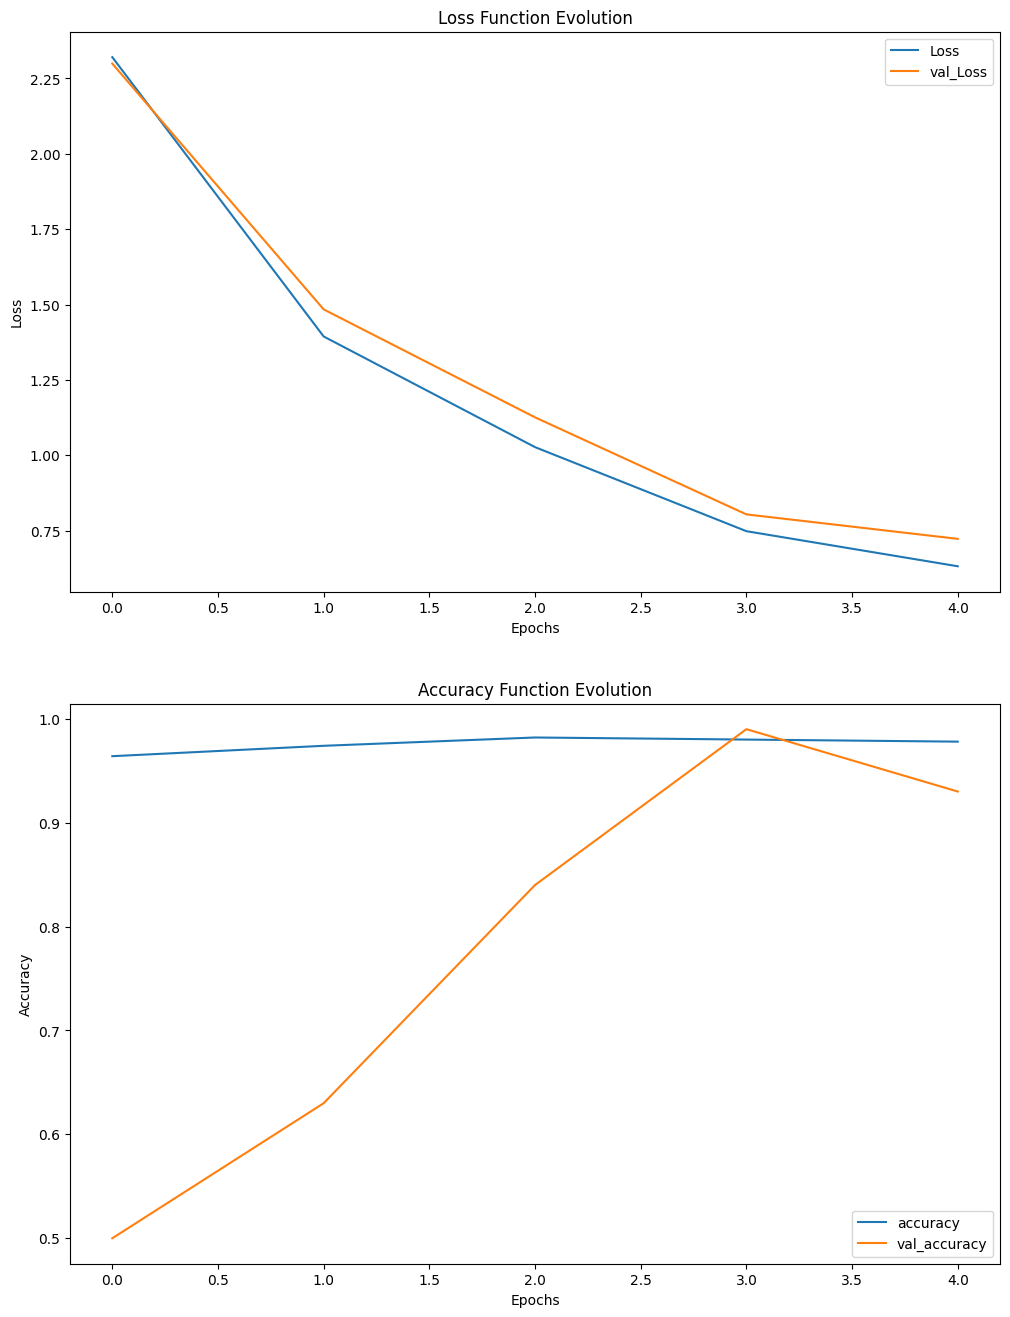

In [ ]:
plt.figure(figsize=(12, 16))

plt.subplot(2, 1, 1)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(2, 1, 2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

10/10 [==============================] - 1s 58ms/step


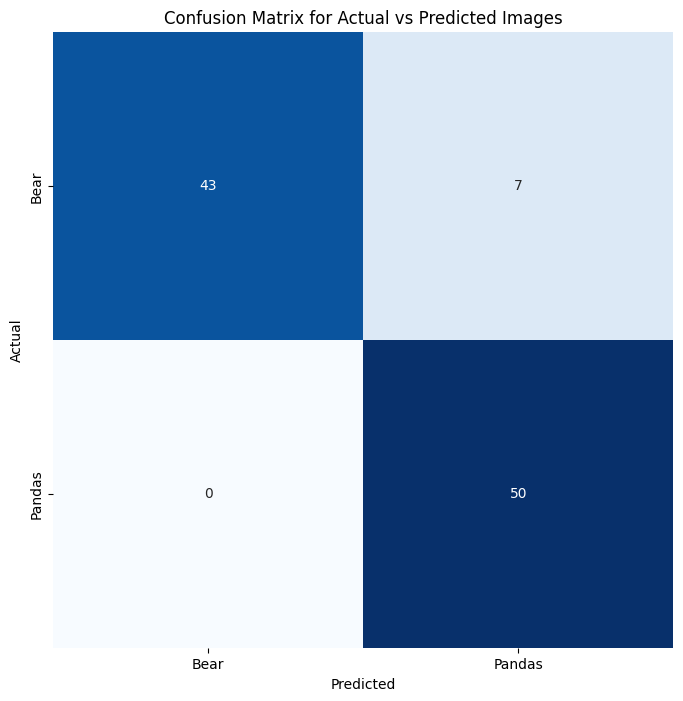

In [ ]:
import seaborn as sns

# Calculate the total number of batches in the test generator
total_batches = len(test_generator)

# Predict labels for the test data using the model
test_img_pred = (model.predict(test_generator) >= 0.5).astype(int)

# Convert test_generator.classes to binary labels
test_labels = test_generator.classes

# Calculate the confusion matrix
cm = confusion_matrix(test_labels, test_img_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='Blues')
plt.title('Confusion Matrix for Actual vs Predicted Images')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks=[0.5, 1.5], labels=['Bear', 'Pandas'])
plt.yticks(ticks=[0.5, 1.5], labels=['Bear', 'Pandas'])
plt.show()
